In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
df = pd.read_csv('../data/clustered_data.csv')
features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'tempo']
stats = df.groupby('cluster')[features].mean()
stats

,danceability,energy,valence,acousticness,instrumentalness,liveness,speechiness,tempo
cluster,,,,,,,,
0,0.567636,0.765595,0.339630,0.070359,0.785762,0.199624,0.077168,0.523217
1,0.504992,0.773921,0.310098,0.078882,0.032015,0.249712,0.091355,0.527851
2,0.501263,0.335744,0.321362,0.750672,0.021695,0.167932,0.055652,0.468758
3,0.638620,0.618845,0.687239,0.616250,0.015164,0.333613,0.159172,0.489967
4,0.681241,0.761570,0.725106,0.121464,0.020907,0.187880,0.096928,0.513402
5,0.405142,0.216064,0.226319,0.865794,0.858122,0.158002,0.056178,0.438102


The variables 'liveness', 'speechiness' and 'tempo' have a limited degree of variability. For this reason they are not very useful for distinguishing between classes, so they will not be considered for interpretation and modeling.

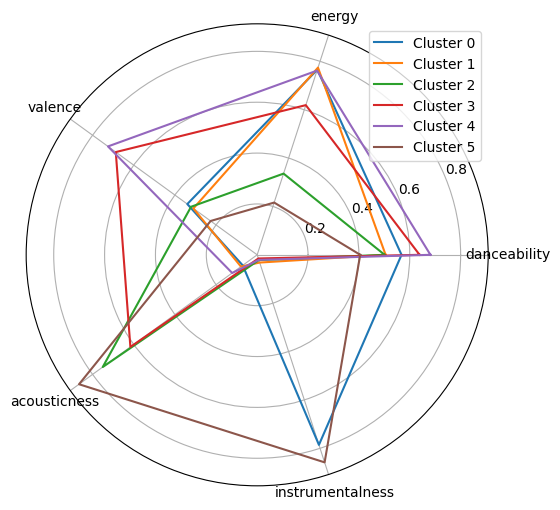

In [49]:
filtered_features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness']

angles = np.linspace(0, 2*np.pi, 5, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

for idx, row in stats.iterrows():
    values = row[filtered_features].values
    values = np.concatenate((values, [values[0]]))
    ax.plot(angles, values, label=f'Cluster {idx}')

# Imposta i tick angolari a 5 posizioni
ax.set_xticks(angles[:-1])

# Imposta i nomi delle variabili come etichette
ax.set_xticklabels(filtered_features)

plt.legend(loc='upper right')
plt.show()

### Cluster Interpretation

Cluster 0: high energy, quite high danceability but low valence -> sad but moving  
Cluster 1: similar to cluster 0, but low instrumentalness, so less vocals -> more metal/electric maybe  
Cluster 2: low energy and valence, high acousticness -> deep sadness  
Cluster 3: high danceability, energy and valence, but also high acousticness -> happy mood  
Cluster 4: similar to 3 but low acousticness -> party music  
Cluster 5: similar to 2 but high instrumentalness -> more soundtrack/ambient calm music  
